# The Import Statements

In [130]:
from collections import Counter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
%matplotlib inline


# loading the dataset

In [131]:
digits = load_digits()


# Explorting the dataset

In [132]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [133]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [134]:
digits.target[0]

0

# The number of classes in the dataset

In [135]:
classes = np.unique(digits.target)
print("classes:", classes)
print("number of classes:", len(classes))

classes: [0 1 2 3 4 5 6 7 8 9]
number of classes: 10


## for the sake of simplicity the targets will be at the last index of the rows

In [136]:
digits_and_targets = np.insert(digits.data, 64, values=digits.target, axis=1)

## splitting the data to a training set and a test set

In [137]:
test, training = train_test_split(digits_and_targets, train_size=.20, random_state=42)


# How the data is modelled.
### The last digit in the Numpy Array is the label of the image  

In [138]:

for i in range(3):
    print("digit: ", training[i][-1], "\n", training[i], "\n")

digit:  6.0 
 [ 0.  0.  0.  7. 12.  0.  0.  0.  0.  0.  4. 16.  8.  0.  0.  0.  0.  0.
 12. 11.  0.  0.  0.  0.  0.  0. 15. 10.  8.  6.  1.  0.  0.  0. 15. 16.
  8. 10.  8.  0.  0.  0. 14.  7.  0.  0. 12.  0.  0.  0.  8. 11.  0.  5.
 16.  2.  0.  0.  0.  9. 14. 14.  5.  0.  6.] 

digit:  9.0 
 [ 0.  0. 11. 16.  8.  0.  0.  0.  0.  6. 16. 11. 13.  9.  0.  0.  0.  7.
 16.  0.  9. 16.  0.  0.  0.  2. 15. 12. 16. 16.  3.  0.  0.  0.  5.  7.
  7. 16.  4.  0.  0.  0.  0.  0.  5. 16.  5.  0.  0.  0.  3.  7. 16. 11.
  0.  0.  0.  0. 13. 16. 11.  1.  0.  0.  9.] 

digit:  3.0 
 [ 0.  0.  8. 15. 12.  4.  0.  0.  0.  5. 14.  4. 11.  7.  0.  0.  0.  0.
  0.  1. 14.  3.  0.  0.  0.  0.  2. 15. 14.  1.  0.  0.  0.  0.  0.  8.
 13. 11.  0.  0.  0.  0.  0.  0.  0. 13.  5.  0.  0.  0. 12.  2.  3. 12.
  7.  0.  0.  0. 13. 16. 15.  8.  0.  0.  3.] 



## A few images from the dataset

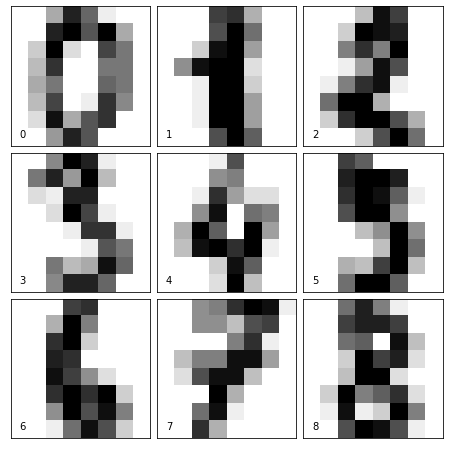

In [139]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# The class for modelling a node in a decision tree

In [140]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        # when this node is a leaf this field will hold the decision of its tree
        self.class_decision = None


# How the decision tree is grown

In [141]:
# for deciding whether there's still entropy in the data
def should_split(data):
    return len(np.unique(data[:,-1])) > 1

# extract the class from the data row
def decide_class(data_and_targets):
    return data_and_targets[:1,-1][0]

# growing a tree from a sample
def grow_tree(data_and_targets, node=Node(), feature_index=0):

    if (len(data_and_targets) > 0 and feature_index == len(data_and_targets[0]) - 1) or not should_split(data_and_targets):
        node.class_decision = decide_class(data_and_targets)
    elif should_split(data_and_targets):
        left_slice = data_and_targets[data_and_targets[:,feature_index]<8]
        right_slice = data_and_targets[data_and_targets[:,feature_index]>=8]

        feature_index+=1

        if len(left_slice):
            node.left = Node()
            grow_tree(left_slice, node.left, feature_index)

        if len(right_slice):
            node.right = Node()
            grow_tree(right_slice, node.right, feature_index)

    return node

# How the the trees of the forest are grown 😊


In [142]:

def create_the_forest(trees_number, sample_size):
    the_forest = []

    for _ in range(trees_number):
        random_indices = np.random.choice(training.shape[0], size=sample_size, replace=False)
        new_tree = grow_tree(training[random_indices])
        the_forest.append(new_tree)

    return the_forest


## A sample with 100 trees, and in this case all the images are used for growing the trees


In [143]:

forest_with_extra_large_samples = create_the_forest(trees_number=100, sample_size=training.shape[0])


# How the testing of the accuracy of the trained model is done

In [144]:
def predict_class(tree_root_node: Node, data, index=0):
    if index == len(data) - 1:
        return tree_root_node.class_decision

    if data[index] < 8:
        if tree_root_node.left is not None:
            return predict_class(tree_root_node.left, data, index+1)

    if data[index] >= 8:
        if tree_root_node.right is not None:
            return predict_class(tree_root_node.right, data, index+1)

    return tree_root_node.class_decision

def get_votes(forest, image):
    votes = []

    for tree in forest:
        votes.append(predict_class(tree, image))

    return votes

def predict_number(forest, image):
    votes = get_votes(forest,image)

    most_common = Counter(votes).most_common(1)[0][0]

    return most_common

In [145]:
def calc_accuracy_of_forest(forest):
    count = 0
    for image in test:
        if predict_number(forest, image) == image[-1]:
            count += 1

    print("the accuracy of the predictions is:", count/test.shape[0])

# The accuracy of the model

In [146]:
calc_accuracy_of_forest(forest_with_extra_large_samples)

the accuracy of the predictions is: 0.6239554317548747


# The problem with the votes!

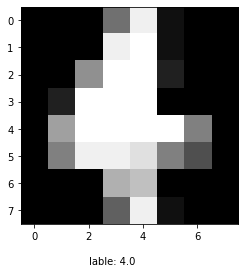

100 trees voted with the following unique votes: [4.]


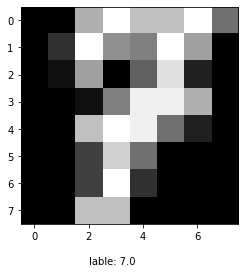

100 trees voted with the following unique votes: [5.]


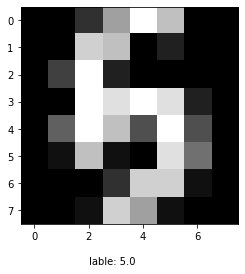

100 trees voted with the following unique votes: [5.]


In [156]:
for test_index in [random.randint(0,100), random.randint(0,100), random.randint(0,100)]:
    plt.gray()
    plt.imshow(test[test_index][:64].reshape(8, 8))
    plt.text(2, 9, "lable: " + str(test[test_index][-1]))
    plt.show()

    the_votes = get_votes(forest_with_extra_large_samples, test[test_index])
    print(len(the_votes), "trees voted with the following unique votes:", np.unique(the_votes))
